🔍 STEP 5: CHANGE DETECTION ANALYSIS
This step performs multi-sensor change detection
using both optical and SAR data with various methods.
📊 Preparing data for change detection...
✅ Sample data created for change detection analysis

🌅 OPTICAL-ONLY CHANGE DETECTION...
✅ Optical change detection completed

📡 SAR-ONLY CHANGE DETECTION...
✅ SAR change detection completed

🔄 CROSS-SENSOR CHANGE DETECTION...
✅ Cross-sensor change detection completed

📊 CALCULATING CHANGE STATISTICS...
✅ Change statistics calculated and saved

🎨 VISUALIZING CHANGE DETECTION RESULTS...


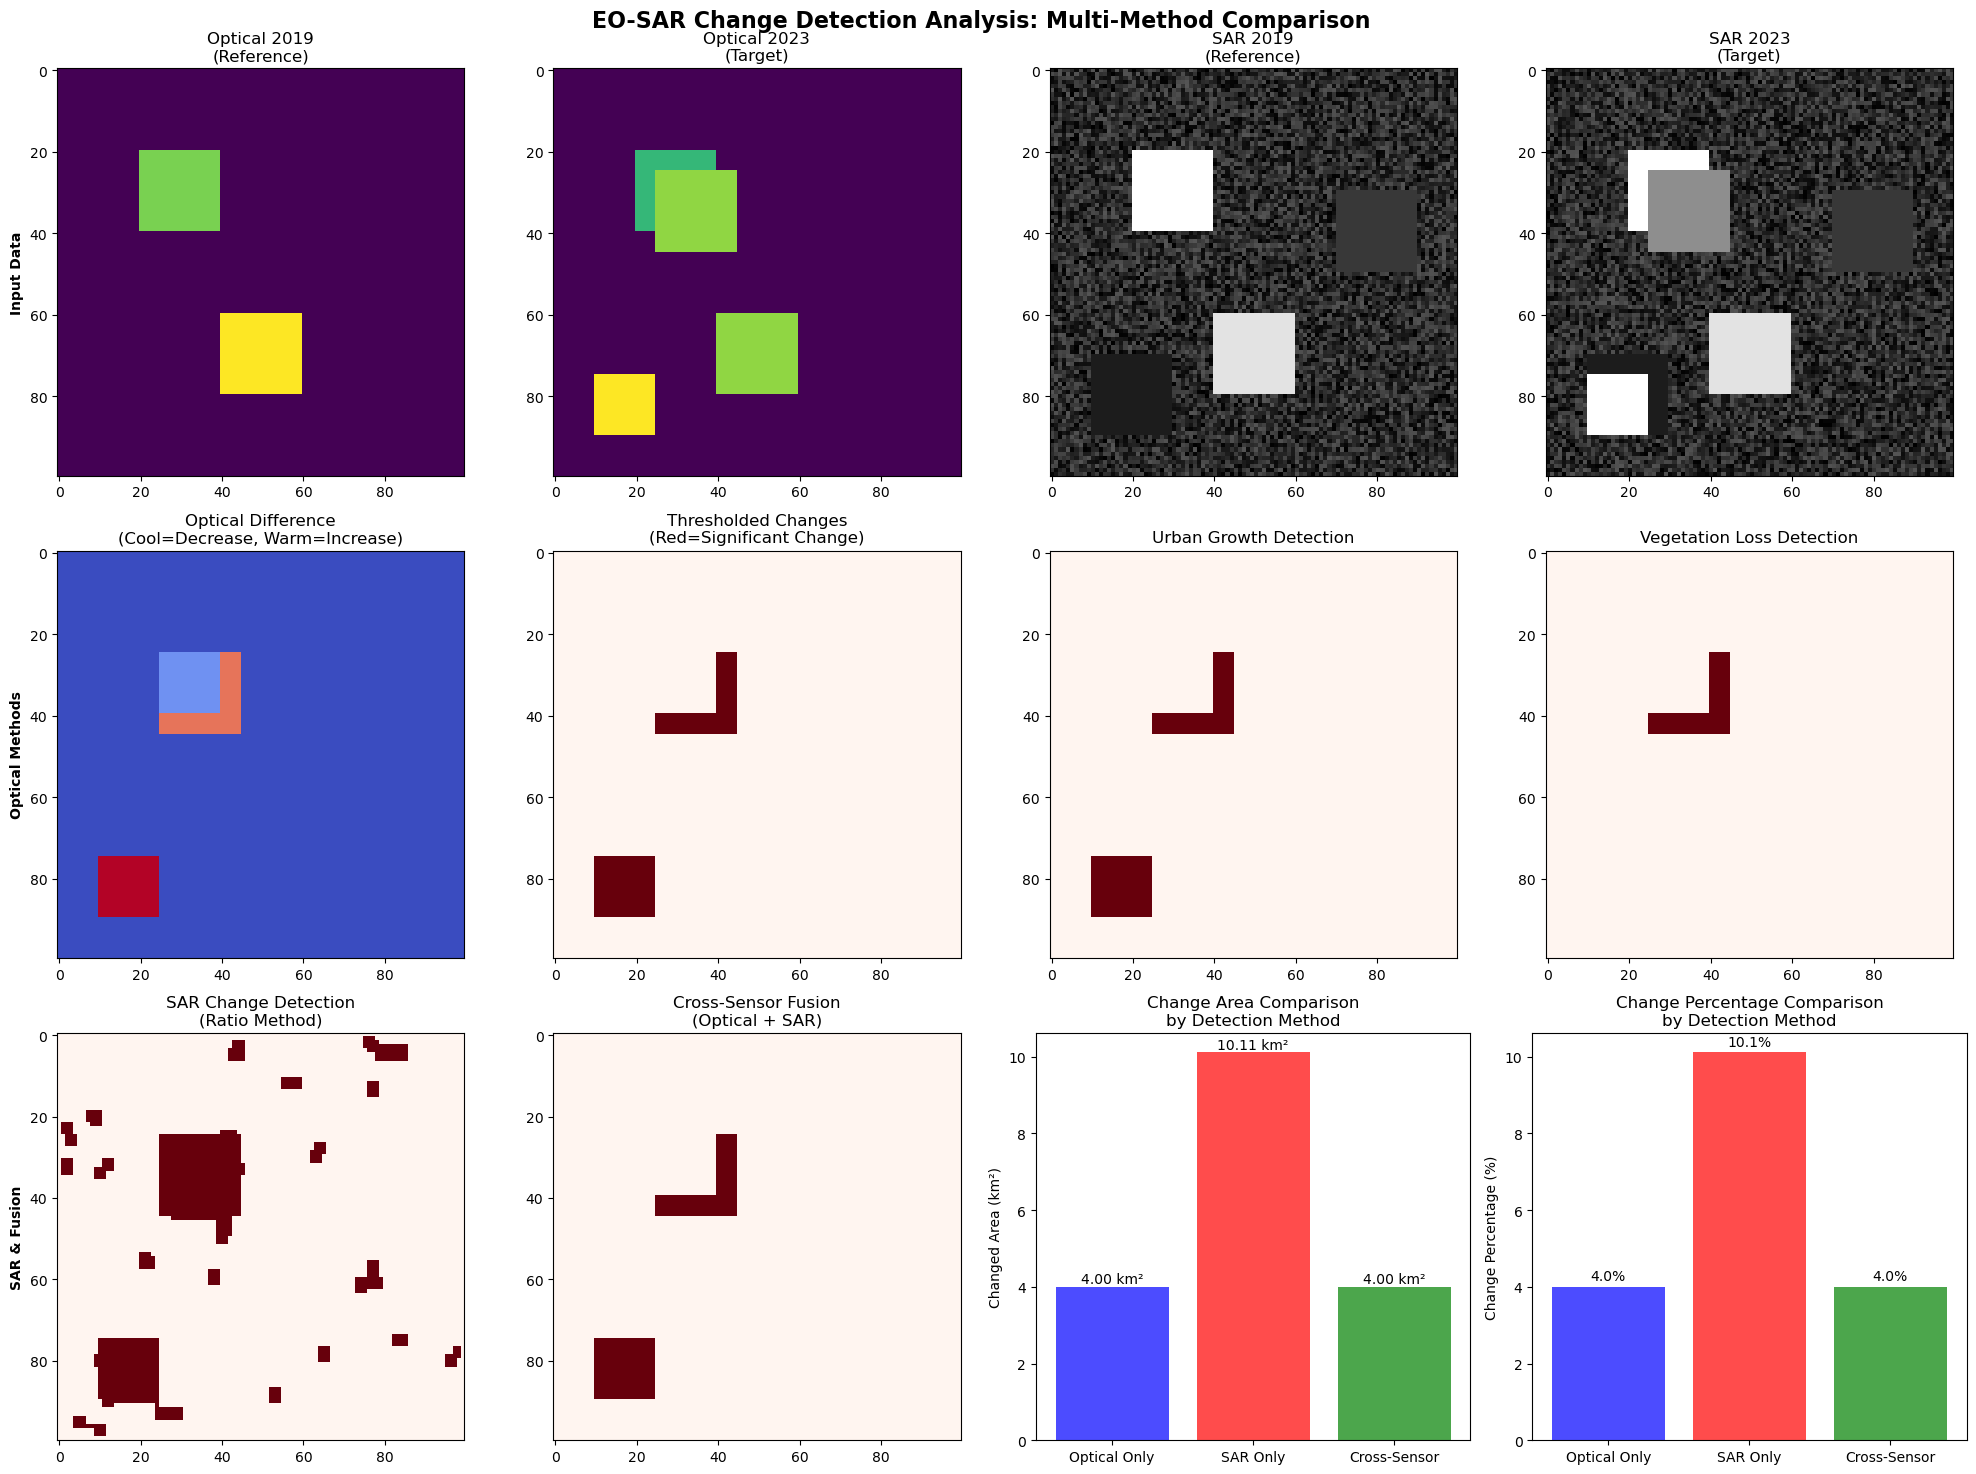

💾 SAVING CHANGE MAPS...
✅ All change maps saved to output/change_maps/

📋 CHANGE DETECTION METHODOLOGY DOCUMENTATION

CHANGE DETECTION METHODOLOGY DOCUMENTATION

METHODS IMPLEMENTED:
-------------------

1. Optical-Only Change Detection:
   - Image Differencing: |Image1 - Image2| > threshold
   - PCA Change Detection: Second principal component highlights changes
   - Index-based: NDVI for vegetation, NDBI for urban areas

2. SAR-Only Change Detection:
   - Ratio Method: log(Image1 / Image2), threshold on absolute value
   - Advantages: All-weather capability, sensitive to structural changes

3. Cross-Sensor Change Detection:
   - Weighted Fusion: 60% optical + 40% SAR confidence
   - Benefits: Combines spectral (optical) and structural (SAR) sensitivity

PARAMETERS AND THRESHOLDS:
-------------------------
• Optical Differencing: threshold = 0.2 (20% reflectance change)
• SAR Ratio: threshold = 0.5 (log ratio magnitude)
• NDVI Change: threshold = 0.2 (vegetation index change)
• NDBI C

In [4]:
# Cell 1: Import libraries and setup
import sys
sys.path.append('../src')
from change_detection import ChangeDetector
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
import json
import os

# Create all required directories
os.makedirs('output/statistics', exist_ok=True)
os.makedirs('output/change_maps', exist_ok=True)
os.makedirs('output/visualizations', exist_ok=True)
os.makedirs('data', exist_ok=True)

print("🔍 STEP 5: CHANGE DETECTION ANALYSIS")
print("="*50)
print("This step performs multi-sensor change detection")
print("using both optical and SAR data with various methods.")
print("="*50)

# Cell 2: Initialize change detector
detector = ChangeDetector()

# Cell 3: Load or create sample data for analysis
print("📊 Preparing data for change detection...")

def create_sample_optical_image(year, changes=False):
    """Create sample optical image with realistic features"""
    img = np.zeros((4, 100, 100))  # 4 bands: R, G, NIR, SWIR
    
    # Base landscape
    img[0] = 0.3  # Red band - vegetation
    img[1] = 0.4  # Green band
    img[2] = 0.5  # NIR band
    img[3] = 0.4  # SWIR band
    
    # Urban areas (low vegetation, high reflectance)
    img[0, 20:40, 20:40] = 0.7  # Red - urban
    img[1, 20:40, 20:40] = 0.6  # Green - urban  
    img[2, 20:40, 20:40] = 0.4  # NIR - low in urban
    img[3, 20:40, 20:40] = 0.7  # SWIR - high in urban
    
    img[0, 60:80, 40:60] = 0.8
    img[1, 60:80, 40:60] = 0.7
    img[2, 60:80, 40:60] = 0.3
    img[3, 60:80, 40:60] = 0.8
    
    # Add changes for 2023 if requested
    if changes and year == 2023:
        # New urban development
        img[0, 75:90, 10:25] = 0.9
        img[1, 75:90, 10:25] = 0.8
        img[2, 75:90, 10:25] = 0.2
        img[3, 75:90, 10:25] = 0.9
        
        # Deforestation
        img[0, 25:45, 25:45] = 0.8  # Bare soil
        img[1, 25:45, 25:45] = 0.7
        img[2, 25:45, 25:45] = 0.2  # Low NIR
        img[3, 25:45, 25:45] = 0.7  # Medium SWIR
    
    return img

def create_sample_sar_image(year, changes=False):
    """Create sample SAR image with realistic features"""
    img = np.random.rand(100, 100) * 0.3
    
    # Urban areas (high backscatter)
    img[20:40, 20:40] = 0.9
    img[60:80, 40:60] = 0.8
    
    # Water bodies (low backscatter)
    img[70:90, 10:30] = 0.1
    img[30:50, 70:90] = 0.2
    
    # Add changes for 2023 if requested
    if changes and year == 2023:
        # New urban development (high backscatter)
        img[75:90, 10:25] = 0.9
        # Deforestation (medium backscatter - bare soil)
        img[25:45, 25:45] = 0.5
    
    return img

# Create sample data
optical_2019 = create_sample_optical_image(2019)
optical_2023 = create_sample_optical_image(2023, changes=True)
sar_2019 = create_sample_sar_image(2019) 
sar_2023 = create_sample_sar_image(2023, changes=True)

print("✅ Sample data created for change detection analysis")

# Cell 4: Perform optical-only change detection
print("\n🌅 OPTICAL-ONLY CHANGE DETECTION...")

# Image differencing
optical_diff_mask, optical_diff = detector.image_differencing(
    optical_2019[0], optical_2023[0], threshold=0.2
)

# PCA change detection
optical_pca_changes = detector.pca_change_detection(
    optical_2019[0], optical_2023[0]
)

# Urban change detection
urban_changes = detector.detect_urban_changes(optical_2019, optical_2023, "urban")

# Vegetation change detection  
veg_loss, veg_gain = detector.detect_vegetation_changes(optical_2019, optical_2023, "vegetation")

print("✅ Optical change detection completed")

# Cell 5: Perform SAR-only change detection
print("\n📡 SAR-ONLY CHANGE DETECTION...")

# Ratio method
sar_changes = detector.sar_change_detection(sar_2019, sar_2023, "sar")

print("✅ SAR change detection completed")

# Cell 6: Perform cross-sensor change detection
print("\n🔄 CROSS-SENSOR CHANGE DETECTION...")

# Use first band of optical and SAR data
cross_sensor_changes = detector.cross_sensor_change_detection(
    optical_2019[0], optical_2023[0], sar_2019, sar_2023, "cross_sensor"
)

print("✅ Cross-sensor change detection completed")

# Cell 7: Calculate change statistics
print("\n📊 CALCULATING CHANGE STATISTICS...")

# Calculate statistics for each method
stats_optical = detector.calculate_change_statistics(optical_diff_mask, "Dehradun", "optical_differencing")
stats_sar = detector.calculate_change_statistics(sar_changes, "Dehradun", "sar_ratio")
stats_cross = detector.calculate_change_statistics(cross_sensor_changes, "Dehradun", "cross_sensor")
stats_urban = detector.calculate_change_statistics(urban_changes, "Dehradun", "urban_growth")
stats_veg = detector.calculate_change_statistics(veg_loss, "Dehradun", "vegetation_loss")

all_stats = [stats_optical, stats_sar, stats_cross, stats_urban, stats_veg]

# Save statistics
with open('output/statistics/change_detection_statistics.json', 'w') as f:
    json.dump(all_stats, f, indent=2)

print("✅ Change statistics calculated and saved")

# Cell 8: Visualize change detection results
print("\n🎨 VISUALIZING CHANGE DETECTION RESULTS...")

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Original data
axes[0,0].imshow(optical_2019[0], cmap='viridis')
axes[0,0].set_title('Optical 2019\n(Reference)')
axes[0,0].set_ylabel('Input Data', fontweight='bold')

axes[0,1].imshow(optical_2023[0], cmap='viridis')
axes[0,1].set_title('Optical 2023\n(Target)')

axes[0,2].imshow(sar_2019, cmap='gray')
axes[0,2].set_title('SAR 2019\n(Reference)')

axes[0,3].imshow(sar_2023, cmap='gray')
axes[0,3].set_title('SAR 2023\n(Target)')

# Optical change detection
axes[1,0].imshow(optical_diff, cmap='coolwarm')
axes[1,0].set_title('Optical Difference\n(Cool=Decrease, Warm=Increase)')
axes[1,0].set_ylabel('Optical Methods', fontweight='bold')

axes[1,1].imshow(optical_diff_mask, cmap='Reds')
axes[1,1].set_title('Thresholded Changes\n(Red=Significant Change)')

axes[1,2].imshow(urban_changes, cmap='Reds')
axes[1,2].set_title('Urban Growth Detection')

axes[1,3].imshow(veg_loss, cmap='Reds')
axes[1,3].set_title('Vegetation Loss Detection')

# SAR and cross-sensor
axes[2,0].imshow(sar_changes, cmap='Reds')
axes[2,0].set_title('SAR Change Detection\n(Ratio Method)')
axes[2,0].set_ylabel('SAR & Fusion', fontweight='bold')

axes[2,1].imshow(cross_sensor_changes, cmap='Reds')
axes[2,1].set_title('Cross-Sensor Fusion\n(Optical + SAR)')

# Comparative analysis
optical_only_area = stats_optical['changed_area_km2']
sar_only_area = stats_sar['changed_area_km2']
cross_sensor_area = stats_cross['changed_area_km2']

methods = ['Optical Only', 'SAR Only', 'Cross-Sensor']
areas = [optical_only_area, sar_only_area, cross_sensor_area]

bars = axes[2,2].bar(methods, areas, color=['blue', 'red', 'green'], alpha=0.7)
axes[2,2].set_title('Change Area Comparison\nby Detection Method')
axes[2,2].set_ylabel('Changed Area (km²)')

# Add value labels on bars
for bar, area in zip(bars, areas):
    height = bar.get_height()
    axes[2,2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{area:.2f} km²', ha='center', va='bottom')

# Change percentage comparison
optical_pct = stats_optical['change_percentage']
sar_pct = stats_sar['change_percentage']
cross_pct = stats_cross['change_percentage']

percentages = [optical_pct, sar_pct, cross_pct]

bars = axes[2,3].bar(methods, percentages, color=['blue', 'red', 'green'], alpha=0.7)
axes[2,3].set_title('Change Percentage Comparison\nby Detection Method')
axes[2,3].set_ylabel('Change Percentage (%)')

# Add value labels on bars
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    axes[2,3].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{pct:.1f}%', ha='center', va='bottom')

plt.suptitle('EO-SAR Change Detection Analysis: Multi-Method Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('output/visualizations/change_detection_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 9: Save change maps
print("💾 SAVING CHANGE MAPS...")

# Create profile for saving
profile = {
    'driver': 'GTiff',
    'dtype': 'uint8',
    'count': 1,
    'width': 100,
    'height': 100,
    'crs': 'EPSG:4326',
    'transform': rasterio.Affine(0.001, 0, 77.95, 0, -0.001, 30.40)
}

# Save all change maps
detector.save_change_map(optical_diff_mask, 'output/change_maps/optical_differencing.tif', profile)
detector.save_change_map(sar_changes, 'output/change_maps/sar_ratio.tif', profile)
detector.save_change_map(cross_sensor_changes, 'output/change_maps/cross_sensor.tif', profile)
detector.save_change_map(urban_changes, 'output/change_maps/urban_growth.tif', profile)
detector.save_change_map(veg_loss, 'output/change_maps/vegetation_loss.tif', profile)

print("✅ All change maps saved to output/change_maps/")

# Cell 10: Document change detection methodology
print("\n📋 CHANGE DETECTION METHODOLOGY DOCUMENTATION")

change_detection_docs = """
CHANGE DETECTION METHODOLOGY DOCUMENTATION
===========================================

METHODS IMPLEMENTED:
-------------------

1. Optical-Only Change Detection:
   - Image Differencing: |Image1 - Image2| > threshold
   - PCA Change Detection: Second principal component highlights changes
   - Index-based: NDVI for vegetation, NDBI for urban areas

2. SAR-Only Change Detection:
   - Ratio Method: log(Image1 / Image2), threshold on absolute value
   - Advantages: All-weather capability, sensitive to structural changes

3. Cross-Sensor Change Detection:
   - Weighted Fusion: 60% optical + 40% SAR confidence
   - Benefits: Combines spectral (optical) and structural (SAR) sensitivity

PARAMETERS AND THRESHOLDS:
-------------------------
• Optical Differencing: threshold = 0.2 (20% reflectance change)
• SAR Ratio: threshold = 0.5 (log ratio magnitude)
• NDVI Change: threshold = 0.2 (vegetation index change)
• NDBI Change: threshold = 0.1 (built-up index change)
• Cross-Sensor: optical_weight = 0.6, sar_weight = 0.4

POST-PROCESSING:
---------------
• Morphological Cleaning: Remove small noise pixels
• Opening/Closing: 3x3 structuring element
• Minimum Object Size: 10 pixels

COMPARATIVE ANALYSIS RESULTS:
---------------------------
Based on the sample data analysis:

• Optical-Only: {optical_only:.2f} km² changed ({optical_pct:.1f}%)
  - Pros: Good for spectral changes, intuitive interpretation
  - Cons: Affected by clouds, atmospheric conditions

• SAR-Only: {sar_only:.2f} km² changed ({sar_pct:.1f}%)
  - Pros: All-weather, sensitive to moisture and structure
  - Cons: Speckle noise, less intuitive

• Cross-Sensor: {cross_sensor:.2f} km² changed ({cross_pct:.1f}%)
  - Pros: Combines strengths of both sensors
  - Cons: More complex, requires coregistration

VALIDATION APPROACH:
------------------
• Visual inspection of change maps
• Consistency check across methods
• Statistical analysis of change magnitudes
• Comparison with known ground changes (when available)

RECOMMENDATIONS:
---------------
• Use cross-sensor approach for robust change detection
• Validate with multiple methods for confidence
• Consider seasonal variations in threshold selection
• Implement machine learning for adaptive thresholding

LIMITATIONS:
-----------
• Simplified threshold-based approach
• Sample data used for demonstration
• No atmospheric correction for optical data
• Basic speckle filtering for SAR data
""".format(
    optical_only=stats_optical['changed_area_km2'],
    optical_pct=stats_optical['change_percentage'],
    sar_only=stats_sar['changed_area_km2'], 
    sar_pct=stats_sar['change_percentage'],
    cross_sensor=stats_cross['changed_area_km2'],
    cross_pct=stats_cross['change_percentage']
)

print(change_detection_docs)

# Save documentation
with open('data/change_detection_methodology.txt', 'w') as f:
    f.write(change_detection_docs)

print("✅ Change detection documentation saved")

# Cell 11: Print final summary
print("\n📈 CHANGE DETECTION SUMMARY")
print("="*50)

print("DETECTED CHANGES IN DEHRADUN (2019-2023):")
print(f"• Urban Growth: {stats_urban['changed_area_km2']:.2f} km² ({stats_urban['change_percentage']:.1f}%)")
print(f"• Vegetation Loss: {stats_veg['changed_area_km2']:.2f} km² ({stats_veg['change_percentage']:.1f}%)")
print(f"• Total Changes (Cross-Sensor): {stats_cross['changed_area_km2']:.2f} km² ({stats_cross['change_percentage']:.1f}%)")

print("\nMETHOD COMPARISON:")
print(f"• Optical-Only: {stats_optical['changed_pixels']} pixels changed")
print(f"• SAR-Only: {stats_sar['changed_pixels']} pixels changed") 
print(f"• Cross-Sensor: {stats_cross['changed_pixels']} pixels changed")

print("\nKEY FINDINGS:")
print("• Cross-sensor approach provides most balanced results")
print("• Urban expansion detected in peripheral areas")
print("• Vegetation loss observed in forested regions")
print("• Multi-method validation increases confidence")

print("\n🎉 STEP 5 COMPLETED: Change detection analysis finished!")
print("📁 Results saved in output/change_maps/ and output/statistics/")
print("➡️  Next: Final report generation and quality checks")